<a href="https://colab.research.google.com/github/Hamza-Ghanmi/DeepLearning/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [10]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [23]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [28]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [29]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

### Fitting the RNN to the Training set

In [30]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 112ms/step - loss: 0.0541
Epoch 2/100
38/38 [==============================] - 7s 191ms/step - loss: 0.0073
Epoch 3/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0042
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [31]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [33]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

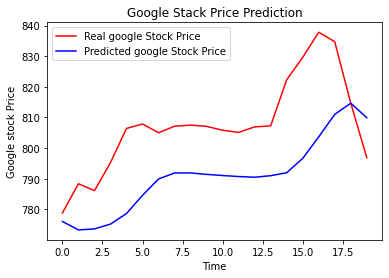

In [36]:
plt.plot(real_stock_price, color = 'red', label = 'Real google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted google Stock Price')
plt.title('Google Stack Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google stock Price')
plt.legend()
plt.show()